In [2]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Feature extraction

In [14]:
%matplotlib inline
from IPython.display import display
from IPython.display import HTML
import os, sys
import numpy as np
import pandas as pd
sys.path.append(os.path.abspath(os.path.join('../..')))

from plot import pyplot as plt
from database.CERNMongoClient import CERNMongoClient
from preprocessing import builder, filter, sliding_window

db = CERNMongoClient(logging=False)

# auto-load changes in imported modules
%autoreload 2

## Fetch data

series                         MKI.A5R8.B2:TEMP_TUBE_UP
timestamps                                             
2016-03-10 00:09:42.785000086                      23.0
2016-03-10 00:24:42.980000019                      23.0
2016-03-10 00:39:43.171000004                      23.0
2016-03-10 00:54:43.373000145                      23.0
2016-03-10 01:09:43.575000048                      23.0

Text(0,0.5,'Temperature')

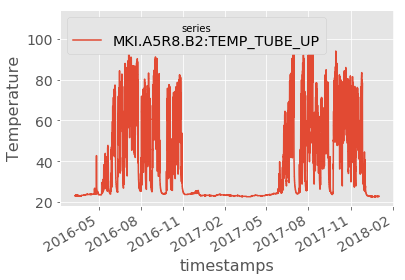

In [11]:
data = db.query("MKI.A5R8.B2:TEMP_TUBE_UP",)
display(data.head())

fig, axes = plt.subplots(nrows=1, ncols=1)
data.plot(ax=axes)
axes.set_ylabel("Temperature")

data = filter.filter_extremes(data)
fig, axes = plt.subplots(nrows=1, ncols=1)
data.plot(ax=axes)
axes.set_ylabel("Temperature")

## Feature Extraction

### Simple Features

In [12]:
mean = data.mean()
std = data.std()
display(mean)
display(std)
display(data.describe())

series
MKI.A5R8.B2:TEMP_TUBE_UP    48.401173
dtype: float64

series
MKI.A5R8.B2:TEMP_TUBE_UP    22.144334
dtype: float64

series  MKI.A5R8.B2:TEMP_TUBE_UP
count              291543.000000
mean                   48.401173
std                    22.144334
min                    22.500000
25%                    24.300000
50%                    48.600000
75%                    68.300000
max                   110.000000

### Sliding Window Mean

In [15]:
min30 = sliding_window.sliding_window_mean(data, 'T', 30)
day = sliding_window.sliding_window_mean(data, 'D', 1)
day10 = sliding_window.sliding_window_mean(data, 'D', 10)
display(data.head(), min30.head(), day.head(), day10.head())

series                         MKI.A5R8.B2:TEMP_TUBE_UP
timestamps                                             
2016-03-10 00:09:42.785000086                      23.0
2016-03-10 00:24:42.980000019                      23.0
2016-03-10 00:39:43.171000004                      23.0
2016-03-10 00:54:43.373000145                      23.0
2016-03-10 01:09:43.575000048                      23.0

series               MKI.A5R8.B2:TEMP_TUBE_UP:SW_MEAN_30_T
timestamps                                                
2016-03-10 00:09:00                                   23.0
2016-03-10 00:10:00                                   23.0
2016-03-10 00:11:00                                   23.0
2016-03-10 00:12:00                                   23.0
2016-03-10 00:13:00                                   23.0

series      MKI.A5R8.B2:TEMP_TUBE_UP:SW_MEAN_1_D
timestamps                                      
2016-03-10                             23.000000
2016-03-11                             23.025000
2016-03-12                             23.004167
2016-03-13                             23.016667
2016-03-14                             23.083333

series      MKI.A5R8.B2:TEMP_TUBE_UP:SW_MEAN_10_D
timestamps                                       
2016-03-10                              23.000000
2016-03-11                              23.012500
2016-03-12                              23.009722
2016-03-13                              23.011458
2016-03-14                              23.025833

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=1)
data.plot(ax=axes, color='b')
min30.plot(ax=axes, color='r')
day.plot(ax=axes, color='g')
day10.plot(ax=axes, color='k')
pd.Series(data.mean()[0], index = data.index).plot(ax=axes, color='y')
labels = ["data", "30Min", "1Day", "10Day", "mean"]
axes.legend(labels)
axes.set_ylabel("Temperature")

Text(0,0.5,'Temperature')